In [65]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv("climate_data.csv", index_col="DATE")
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-28,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,9.40,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-29,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,9.40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-30,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,8.50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.isnull().sum() #sum of missing values in each column

STATION        0
NAME           0
ACMH       11963
ACSH       11963
AWND        8808
DAPR       17799
FMTM       15617
FRGT       17805
MDPR       17799
PGTM        9294
PRCP         284
SNOW        6427
SNWD        6303
TAVG       15770
TMAX          11
TMIN          14
TSUN       16656
WDF1       11963
WDF2        8807
WDF5        8896
WDFG       13540
WSF1       11963
WSF2        8806
WSF5        8896
WSFG       13540
WT01       13830
WT02       17457
WT03       17673
WT04       17803
WT05       17778
WT07       17805
WT08       14556
WT09       17805
WT16       15852
WT18       17804
dtype: int64

In [4]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy() #core features of the dataset as per documentation

In [5]:
core_weather.columns = ["precipitation", "snow", "snow_depth", "temp_max", "temp_min"] #renaming the columns

In [6]:
core_weather

,precipitation,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2024-08-28,0.0,NaN,NaN,75.0,58.0
2024-08-29,0.0,NaN,NaN,72.0,61.0
2024-08-30,0.0,NaN,NaN,74.0,62.0


In [7]:
core_weather.isnull().sum() #sum of missing values in new dataframe

precipitation     284
snow             6427
snow_depth       6303
temp_max           11
temp_min           14
dtype: int64

In [8]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [9]:
del core_weather["snow"] #deleting 'snow' column as it does not provide good insight

In [10]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [11]:
del core_weather["snow_depth"] #deleting 'snow_depth' column as it does not provide good insight

In [12]:
core_weather["precipitation"].value_counts()

0.00    14468
0.01      445
0.02      205
0.03      126
0.04      106
        ...  
1.38        1
1.95        1
2.01        1
1.41        1
1.28        1
Name: precipitation, Length: 179, dtype: int64

In [13]:
#As 'precipitation' column does have valuable data lets fill the missing data.
#Filling data with '0' as it has most counts
core_weather["precipitation"] = core_weather["precipitation"].fillna(0)

In [14]:
#'temp_max' and 'temp_min' have lesser null values from above observation
#Filling data with 'Forward Fill' concept
core_weather = core_weather.fillna(method="ffill")

In [15]:
core_weather.isnull().sum() #Recheck for null values

precipitation    0
temp_max         0
temp_min         0
dtype: int64

In [16]:
core_weather

,precipitation,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2024-08-28,0.0,75.0,58.0
2024-08-29,0.0,72.0,61.0
2024-08-30,0.0,74.0,62.0


In [17]:
core_weather.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
dtype: object

In [18]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26', '2024-08-27',
       '2024-08-28', '2024-08-29', '2024-08-30', '2024-08-31', '2024-09-01'],
      dtype='object', name='DATE', length=17807)

In [19]:
core_weather.index = pd.to_datetime(core_weather.index)

In [20]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2024-08-23', '2024-08-24', '2024-08-25', '2024-08-26',
               '2024-08-27', '2024-08-28', '2024-08-29', '2024-08-30',
               '2024-08-31', '2024-09-01'],
              dtype='datetime64[ns]', name='DATE', length=17807, freq=None)

In [21]:
#As mentioned in data documentation, 9’s in a field (e.g.9999) indicate missing data or data that has not been received.
#Checking for '9999' in our dataframe
core_weather.apply(lambda x: (x==9999).sum())

precipitation    0
temp_max         0
temp_min         0
dtype: int64

In [22]:
#Creating a new feature 'target' which contains the maximum temperature of next day (this can be used for predictions)
core_weather["target"] = core_weather.shift(-1)["temp_max"]
core_weather

,precipitation,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-08-28,0.0,75.0,58.0,72.0
2024-08-29,0.0,72.0,61.0,74.0
2024-08-30,0.0,74.0,62.0,74.0


In [23]:
#Removing the last row as it contains null value
core_weather = core_weather.iloc[:-1,:].copy()
core_weather

,precipitation,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2024-08-27,0.0,90.0,57.0,75.0
2024-08-28,0.0,75.0,58.0,72.0
2024-08-29,0.0,72.0,61.0,74.0


In [24]:
reg = Ridge(alpha=.1)

In [25]:
predictors = ["precipitation", "temp_max", "temp_min"]

In [26]:
train = core_weather.loc[:"2020-12-31"]

In [27]:
test = core_weather.loc["2021-01-01":]

In [28]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [29]:
predictions = reg.predict(test[predictors])

In [30]:
mean_absolute_error(test["target"], predictions)

3.3198368926725252

In [31]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2024-08-27,75.0,84.494912
2024-08-28,72.0,73.857527
2024-08-29,74.0,72.233184


<AxesSubplot:xlabel='DATE'>

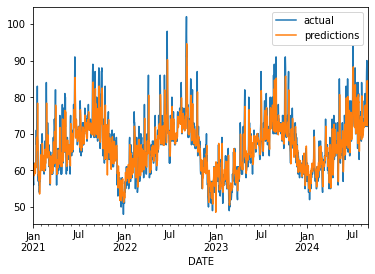

In [32]:
combined.plot()

In [33]:
#wrapping up in a function
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_absolute_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [34]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [35]:
#core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [36]:
#core_weather["max_to_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [37]:
core_weather

,precipitation,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.0,49.0,30.0,49.0,NaN
1960-01-02,0.0,49.0,29.0,54.0,NaN
1960-01-03,0.0,54.0,35.0,54.0,NaN
1960-01-04,0.0,54.0,36.0,55.0,NaN
1960-01-05,0.0,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2024-08-27,0.0,90.0,57.0,75.0,74.866667
2024-08-28,0.0,75.0,58.0,72.0,75.066667
2024-08-29,0.0,72.0,61.0,74.0,75.066667


In [41]:
predictors = ["precipitation", "temp_max", "temp_min", "month_max"]

In [42]:
core_weather = core_weather.iloc[30:,:].copy()

In [43]:
error, combined = create_predictions(predictors, core_weather, reg)

In [44]:
error

3.2395477459537156

<AxesSubplot:xlabel='DATE'>

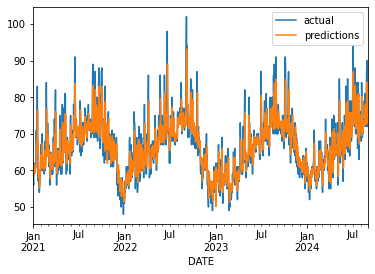

In [45]:
combined.plot()

In [46]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [47]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [48]:
core_weather

,precipitation,temp_max,temp_min,target,month_max,monthly_avg,day_of_year_avg
DATE,,,,,,,
1960-03-01,0.00,55.0,43.0,58.0,59.866667,55.000000,55.000000
1960-03-02,0.00,58.0,40.0,62.0,59.733333,56.500000,58.000000
1960-03-03,0.00,62.0,47.0,62.0,59.833333,58.333333,62.000000
1960-03-04,0.00,62.0,52.0,58.0,59.933333,59.250000,62.000000
1960-03-05,0.13,58.0,54.0,59.0,59.866667,59.000000,58.000000
...,...,...,...,...,...,...,...
2024-08-27,0.00,90.0,57.0,75.0,74.866667,72.130779,75.081633
2024-08-28,0.00,75.0,58.0,72.0,75.066667,72.132673,73.571429
2024-08-29,0.00,72.0,61.0,74.0,75.066667,72.132586,73.428571


In [51]:
predictors = ["precipitation", "temp_max", "temp_min", "month_max", "monthly_avg", "day_of_year_avg"]

In [52]:
error, combined = create_predictions(predictors, core_weather, reg)

In [53]:
error

3.2021298575541786

In [54]:
#Adding more features
core_weather['temp_max_1'] = core_weather['temp_max'].shift(1)
core_weather['temp_min_1'] = core_weather['temp_min'].shift(1)

In [55]:
core_weather['temp_max_2'] = core_weather['temp_max'].shift(2)
core_weather['temp_min_2'] = core_weather['temp_min'].shift(2)

In [56]:
core_weather["week_max"] = core_weather["temp_max"].rolling(7).mean()
#core_weather["precip_7_day"] = core_weather["precipitation"].rolling(7).sum()

In [57]:
core_weather = core_weather.iloc[7:,:].copy()

In [58]:
core_weather

,precipitation,temp_max,temp_min,target,month_max,monthly_avg,day_of_year_avg,temp_max_1,temp_min_1,temp_max_2,temp_min_2,week_max
DATE,,,,,,,,,,,,
1960-03-08,0.00,61.0,43.0,60.0,59.733333,59.500000,61.000000,61.0,50.0,59.0,52.0,60.142857
1960-03-09,0.00,60.0,44.0,62.0,59.733333,59.555556,60.000000,61.0,43.0,61.0,50.0,60.428571
1960-03-10,0.00,62.0,38.0,60.0,59.966667,59.800000,62.000000,60.0,44.0,61.0,43.0,60.428571
1960-03-11,0.13,60.0,49.0,59.0,59.966667,59.818182,60.000000,62.0,38.0,60.0,44.0,60.142857
1960-03-12,0.30,59.0,52.0,62.0,59.900000,59.750000,59.000000,60.0,49.0,62.0,38.0,60.285714
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-27,0.00,90.0,57.0,75.0,74.866667,72.130779,75.081633,87.0,59.0,82.0,57.0,79.142857
2024-08-28,0.00,75.0,58.0,72.0,75.066667,72.132673,73.571429,90.0,57.0,87.0,59.0,79.285714
2024-08-29,0.00,72.0,61.0,74.0,75.066667,72.132586,73.428571,75.0,58.0,90.0,57.0,79.142857


In [59]:
predictors = ["precipitation", "temp_max", "temp_min", "month_max", "monthly_avg", "day_of_year_avg", "temp_max_2", "temp_min_2", "temp_max_1", "temp_min_1", "week_max"]

In [60]:
error, combined = create_predictions(predictors, core_weather, reg)

In [61]:
print(f"Mean Absolute Error after adding features: {round(error, 4)}")

Mean Absolute Error after adding features: 3.1849


In [62]:
core_weather.corr()["target"]

precipitation     -0.206045
temp_max           0.821813
temp_min           0.597104
target             1.000000
month_max          0.688712
monthly_avg        0.691252
day_of_year_avg    0.713118
temp_max_1         0.681589
temp_min_1         0.577740
temp_max_2         0.605556
temp_min_2         0.570949
week_max           0.727938
Name: target, dtype: float64

<AxesSubplot:>

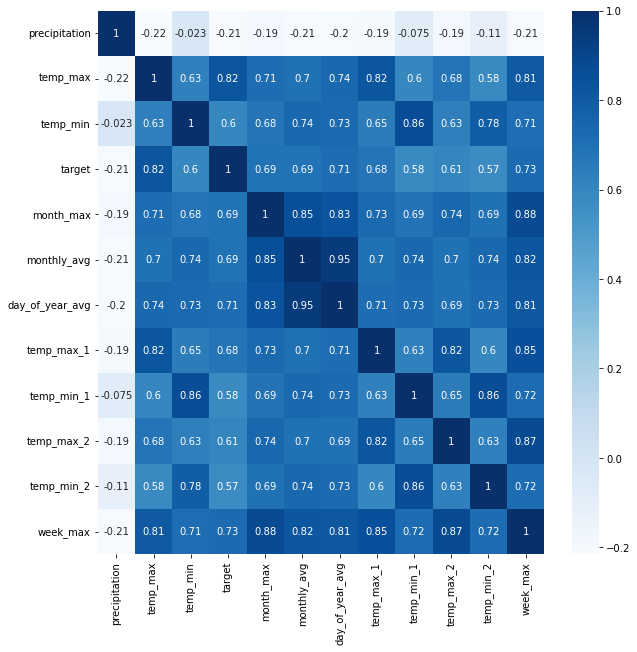

In [63]:
#plotting heatmap to have visual insight of correlation of features
plt.figure(figsize=(10,10))
sns.heatmap(core_weather.corr(), annot=True, cmap="Blues")

<AxesSubplot:xlabel='DATE'>

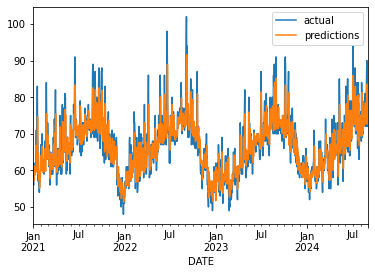

In [64]:
combined.plot()